<a href="https://colab.research.google.com/github/bondsoncruso/Colab/blob/main/portfolio_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --pre --upgrade alpha_vantage 

Requirement already up-to-date: pandas-datareader in /usr/local/lib/python3.6/dist-packages (0.9.0)
     |████████████████████████████████| 1.2MB 4.1MB/s 
     |████████████████████████████████| 153kB 42.3MB/s 
     |████████████████████████████████| 296kB 48.5MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25706 sha256=3271baf05fc602fbdfd52f2d0ee37d458eedfd9abb5f77409595c3eb44db38da
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=eaaa47f34b56efc1378a7e416e6ee40d9a32d9400093f30a657e770c66bf3694
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from pandas_datareader.stooq import StooqDailyReader


import time

api_key ='OVGC8KHNZCEZ89YF'

ts = TimeSeries(key= api_key, output_format='pandas')


In [ ]:
ts.get_symbol_search(keywords='MINDACOR')

(                1. symbol                    2. name  ... 8. currency 9. matchScore
 date                                                  ...                          
 1970-01-01  MINDACORP.BSE  Minda Corporation Limited  ...         INR        0.8000
 
 [1 rows x 9 columns], None)

In [ ]:
#check symbols here
#ts.get_daily(symbol=['TATACOFFEE.BSE'])

In [ ]:
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date, periods=10, freq='D')
seed = pd.DataFrame(index=index)

In [ ]:
symbol = '504058.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'NIPPOBATRY'}, inplace = True)
portfolio = data.join(seed)

In [ ]:
symbol = '539876.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'CROMPTON'}, inplace = True)
portfolio = data.join(seed)
symbol = '542867.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'CSBBANK'}, inplace = True)
portfolio = data.join(portfolio)
symbol = '538962.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'MINDACORP'}, inplace = True)
portfolio = data.join(portfolio)
symbol = '532301.BSE'
data = ts.get_daily(symbol=[symbol], outputsize='full')
data = data[0]
data = data.drop(['1. open','2. high','3. low','5. volume'],axis=1)
data.rename(columns = {'4. close':'TATACOFFEE'}, inplace = True)
portfolio = data.join(portfolio)


  



In [ ]:
portfolio = portfolio.bfill(axis = 0)
portfolio

,TATACOFFEE,MINDACORP,CSBBANK,CROMPTON
date,,,,
2020-11-04,100.25,66.45,236.50,308.00
2020-11-03,99.80,65.85,234.75,296.80
2020-11-02,100.10,66.90,236.25,291.65
2020-10-30,101.50,67.60,230.60,299.00
2020-10-29,101.55,68.70,224.40,294.40
...,...,...,...,...
2005-01-07,299.35,NaN,NaN,NaN
2005-01-06,288.45,NaN,NaN,NaN
2005-01-05,272.95,NaN,NaN,NaN


In [ ]:
weights = []
total = portfolio.iloc[0,:].sum()
for i in range(portfolio.shape[1]):
  weights.append(portfolio.iloc[0,i]/total)

  
  

In [ ]:
weights = np.array(weights)
print(weights.shape)
weights

(4,)


array([0.14095894, 0.09343363, 0.33253656, 0.43307087])

In [ ]:
# for variance need daily returns
daily_returns = portfolio.pct_change(-1)
# multiplied by 250 to annualize
cov_matrix_d = (daily_returns.cov())*250
print(cov_matrix_d.shape)
cov_matrix_d


(4, 4)


,TATACOFFEE,MINDACORP,CSBBANK,CROMPTON
TATACOFFEE,0.205514,0.017711,0.005517,0.003178
MINDACORP,0.017711,0.077385,0.005587,0.003560
CSBBANK,0.005517,0.005587,0.016667,0.003516
CROMPTON,0.003178,0.003560,0.003516,0.008569


In [ ]:
np.dot(cov_matrix_d,weights)

array([0.03383477, 0.0131267 , 0.00836464, 0.00566069])

In [ ]:
# variance of a portfolio is dot product of weights transposed * cov * weights
port_variance = np.dot(weights.T,np.dot(cov_matrix_d, weights))
print('Variance of the portfolio is ' + str(np.round(port_variance *100,3) ) + '%')
port_stddev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix_d, weights)))
print('Standard Deviation of the portfolio is ' + str(np.round(port_stddev*100,3)) + '%')



Variance of the portfolio is 1.123%
Standard Deviation of the portfolio is 10.597%


In [ ]:
print('Annualized Returns')
for i in portfolio.columns:
  stock = portfolio[i].dropna()
  months = stock.count()
  total_ret = (stock[0] - stock[-1])/stock[-1]
  annualized_ret = ((1 + total_ret)**(12/months)) - 1
  print(str(i) + ' = ' + str(round(annualized_ret * 100,2)) + '%')

Annualized Returns
TATACOFFEE = -0.3%
MINDACORP = -0.29%
CSBBANK = -1.23%
CROMPTON = 0.98%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdecc3eac88>,
      dtype=object)

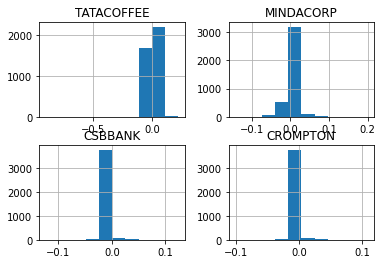

In [ ]:
portfolio.pct_change(-1).hist()

In [ ]:
portfolio.pct_change(-1).skew()
#if more than one or less than minus one it is highly skewed
#from -1 to -0.5 and 0.5 to 1 is moderately skewed
#other wise no skewnewss
#if skew positive then it distributions are towards the left

TATACOFFEE   -7.118846
MINDACORP     2.143357
CSBBANK       0.507872
CROMPTON      1.656389
dtype: float64

In [ ]:
#high kurtosis means fat tails in normal distrubation (if bigger than 3)
portfolio.pct_change(-1).kurtosis()


TATACOFFEE    253.181313
MINDACORP      26.033979
CSBBANK        88.603334
CROMPTON       93.826498
dtype: float64